# **Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.**

## **Task 1: Data Preparation**
### **Loading the data**

In [ ]:
!pip install tensorflow keras


In [ ]:
import tensorflow as tf
print (tf.keras.__version__)

3.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Download the provided folder that contains the Devnagari digits dataset.**





Training set: (16988, 28, 28, 1), Labels: (16988, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


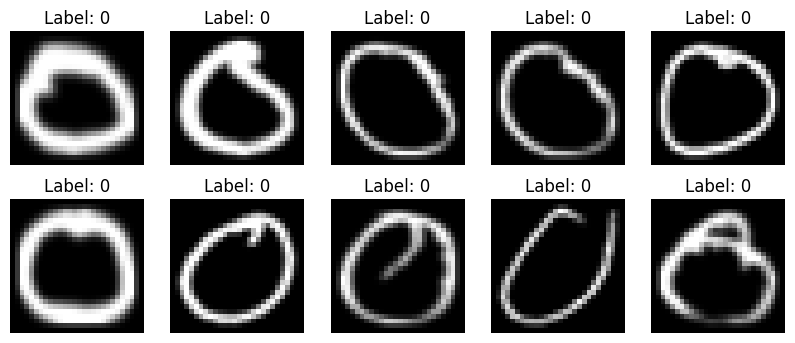

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "/content/drive/My Drive/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/drive/My Drive/DevanagariHandwrittenDigitDataset/Test/"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)

    # Map class names to numeric labels
    class_map = {f"digit_{i}": i for i in range(10)}  # Map 'digit_0' -> 0, 'digit_1' -> 1, ...

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)

        # Check if the folder is valid (i.e., follows the 'digit_0', 'digit_1' naming scheme)
        if class_name in class_map:
            label = class_map[class_name]

            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)

                # Load image using PIL
                img = Image.open(img_path).convert("L")  # Convert to grayscale
                img = img.resize((img_width, img_height))  # Resize to (28,28)
                img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
num_classes = len(set(y_train))  # Get the total number of classes dynamically
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.show()


### **Task 2: Build the FCN Model**

**Model Architecture**

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)
summary = model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

### **Task 3: Compile the Model**

**Model Compilation**

In [ ]:
# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Evaluation metric


### **Task 4: Train the Model**

**Model Training**

In [ ]:
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.2,
callbacks=callbacks,
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2688 - loss: 1.9852 - val_accuracy: 0.0000e+00 - val_loss: 7.0712
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7971 - loss: 0.6677 - val_accuracy: 0.0000e+00 - val_loss: 8.1611
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9137 - loss: 0.3027 - val_accuracy: 0.0000e+00 - val_loss: 8.7725
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9479 - loss: 0.1989 - val_accuracy: 0.0000e+00 - val_loss: 9.0135
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9585 - loss: 0.1484 - val_accuracy: 0.0000e+00 - val_loss: 9.2822


### **Task 5: Evaluate the Model**

**Evaluate the Model**

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 4ms/step - accuracy: 0.7620 - loss: 1.9904
Test Loss: 1.9904
Test accuracy: 0.7620


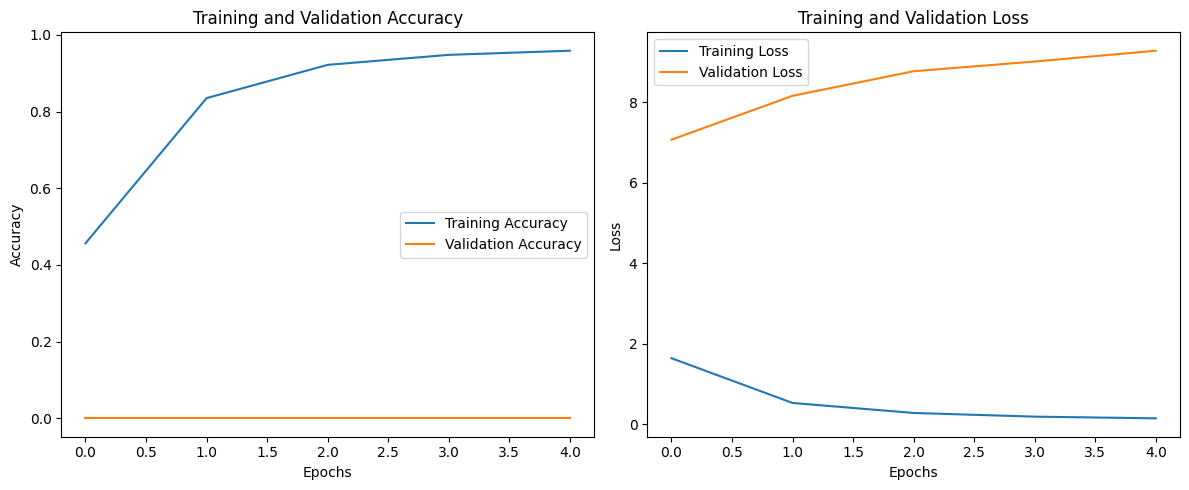

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### **Task 5: Evaluate the Model**

**Save and Load the Model**

In [ ]:
# Save the trained model to an .h5 file
model.save('/content/drive/My Drive/devnagari_model.h5')

print("Model saved to devnagari_digit_model.h5")


Model saved to devnagari_digit_model.h5


In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('devnagari_digit_model.h5')

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9390 - loss: 0.3600
Test Loss: 1.9904
Test Accuracy: 0.7620


### **Task 5: Predictions**

**Making Predictions**

In [ ]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0


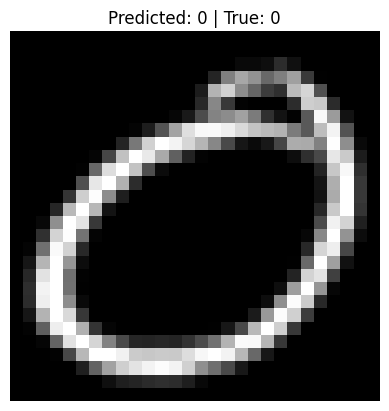

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first image and its prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_labels[0]} | True: {np.argmax(y_test[0])}")
plt.axis("off")
plt.show()
